# **Basic Insights**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%reload_ext autoreload
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/solar_data_without_day.csv')

In [ ]:
df

,Year,Month,Day,Hour,Minute,City,Latitude,Longitude,Clearsky DHI,Clearsky DNI,...,Date,Season,ClearskyDHI_Lag,ClearskyDHI_Lag_1,ClearskyDHI_Lag_3,ClearskyDHI_Lag_6,ClearskyDHI_Lag_12,ClearskyDHI_RollingMean,ClearskyDHI_SameHour_LastWeek,ClearskyDHI_SameHour_LastMonth
0,2022,1,1,0,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 00:00:00,Winter,44.189414,44.189288,44.189414,44.189604,44.189557,44.189351,44.194439,44.211052
1,2022,1,1,1,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 01:00:00,Winter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022,1,1,2,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 02:00:00,Winter,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
3,2022,1,1,3,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 03:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
4,2022,1,1,4,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 04:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,2019,12,31,19,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 19:00:00,Winter,36.000000,0.000000,36.000000,71.000000,0.000000,0.000000,0.000000,0.000000
700796,2019,12,31,20,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 20:00:00,Winter,0.000000,0.000000,0.000000,64.000000,27.000000,0.000000,0.000000,0.000000
700797,2019,12,31,21,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 21:00:00,Winter,0.000000,0.000000,0.000000,54.000000,53.000000,0.000000,0.000000,0.000000
700798,2019,12,31,22,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 22:00:00,Winter,0.000000,0.000000,0.000000,36.000000,66.000000,0.000000,0.000000,0.000000


In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'City', 'Latitude',
       'Longitude', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Date', 'Season',
       'ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 'ClearskyDHI_Lag_3',
       'ClearskyDHI_Lag_6', 'ClearskyDHI_Lag_12', 'ClearskyDHI_RollingMean',
       'ClearskyDHI_SameHour_LastWeek', 'ClearskyDHI_SameHour_LastMonth'],
      dtype='object')

In [ ]:
df.describe()

,Year,Month,Day,Hour,Minute,Latitude,Longitude,Clearsky DHI,Clearsky DNI,Clearsky GHI,...,Wind Direction,Wind Speed,ClearskyDHI_Lag,ClearskyDHI_Lag_1,ClearskyDHI_Lag_3,ClearskyDHI_Lag_6,ClearskyDHI_Lag_12,ClearskyDHI_RollingMean,ClearskyDHI_SameHour_LastWeek,ClearskyDHI_SameHour_LastMonth
count,700800.000000,700800.000000,700800.000000,700800.000000,700800.0,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,...,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000,700800.000000
mean,2020.500000,6.526027,15.720548,11.500000,0.0,36.140000,-102.209000,44.189225,357.202581,249.911467,...,189.222463,2.369784,44.189288,44.189288,44.189288,44.189288,44.189352,44.189288,44.188759,44.188095
std,1.118035,3.447854,8.796253,6.922191,0.0,5.300807,21.461706,53.878308,393.097435,324.637267,...,97.956523,1.741222,53.878282,53.878282,53.878282,53.878282,53.878266,52.096660,53.878107,53.877652
min,2019.000000,1.000000,1.000000,0.000000,0.0,21.300000,-157.850000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.750000,4.000000,8.000000,5.750000,0.0,33.275000,-117.225000,0.000000,0.000000,0.000000,...,106.000000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020.500000,7.000000,16.000000,11.500000,0.0,36.750000,-105.820000,0.000000,0.000000,0.000000,...,202.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,19.333333,0.000000,0.000000
75%,2021.250000,10.000000,23.000000,17.250000,0.0,40.005000,-84.600000,85.000000,790.000000,507.000000,...,266.000000,3.200000,85.000000,85.000000,85.000000,85.000000,85.000000,83.000000,85.000000,85.000000
max,2022.000000,12.000000,31.000000,23.000000,0.0,44.480000,-72.690000,587.000000,1099.000000,1107.000000,...,360.000000,19.200000,587.000000,587.000000,587.000000,587.000000,587.000000,550.000000,587.000000,587.000000


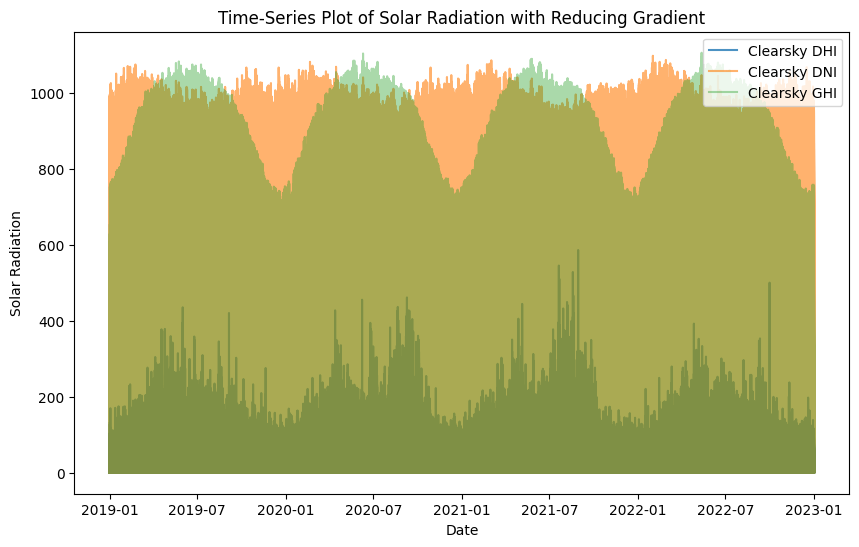

In [ ]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])


plt.figure(figsize=(10, 6))

# Clearsky DHI with reducing gradient
for i, (col, label) in enumerate(zip(['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'], ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI'])):
    alpha = 1 - (i+1) / 5  # alpha value for reducing gradient
    plt.plot(df['Date'], df[col], label=label, alpha=alpha)


plt.title('Time-Series Plot of Solar Radiation with Reducing Gradient')
plt.xlabel('Date')
plt.ylabel('Solar Radiation')
plt.legend()

plt.show()


### **We already did feature engineering in phase 1 and we have all the required features like wind speed, lag features, etc.**

# **LSTM-Long Short-Term Memory**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product
import seaborn as sns
from tensorflow.keras.callbacks import Callback
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/solar_data_without_day.csv")

In [ ]:
data

,Year,Month,Day,Hour,Minute,City,Latitude,Longitude,Clearsky DHI,Clearsky DNI,...,Date,Season,ClearskyDHI_Lag,ClearskyDHI_Lag_1,ClearskyDHI_Lag_3,ClearskyDHI_Lag_6,ClearskyDHI_Lag_12,ClearskyDHI_RollingMean,ClearskyDHI_SameHour_LastWeek,ClearskyDHI_SameHour_LastMonth
0,2022,1,1,0,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 00:00:00,Winter,44.189414,44.189288,44.189414,44.189604,44.189557,44.189351,44.194439,44.211052
1,2022,1,1,1,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 01:00:00,Winter,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2022,1,1,2,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 02:00:00,Winter,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000
3,2022,1,1,3,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 03:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
4,2022,1,1,4,0,Albuquerque,35.08,-106.65,0,0,...,2022-01-01 04:00:00,Winter,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700795,2019,12,31,19,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 19:00:00,Winter,36.000000,0.000000,36.000000,71.000000,0.000000,0.000000,0.000000,0.000000
700796,2019,12,31,20,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 20:00:00,Winter,0.000000,0.000000,0.000000,64.000000,27.000000,0.000000,0.000000,0.000000
700797,2019,12,31,21,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 21:00:00,Winter,0.000000,0.000000,0.000000,54.000000,53.000000,0.000000,0.000000,0.000000
700798,2019,12,31,22,0,"Washington, D.C.",38.90,-77.03,0,0,...,2019-12-31 22:00:00,Winter,0.000000,0.000000,0.000000,36.000000,66.000000,0.000000,0.000000,0.000000


In [ ]:
# list of categorical variables
categorical_variables = data.select_dtypes(include=['object']).columns.tolist()

print("List of categorical variables:")
print(categorical_variables)


List of categorical variables:
['City', 'Date', 'Season']


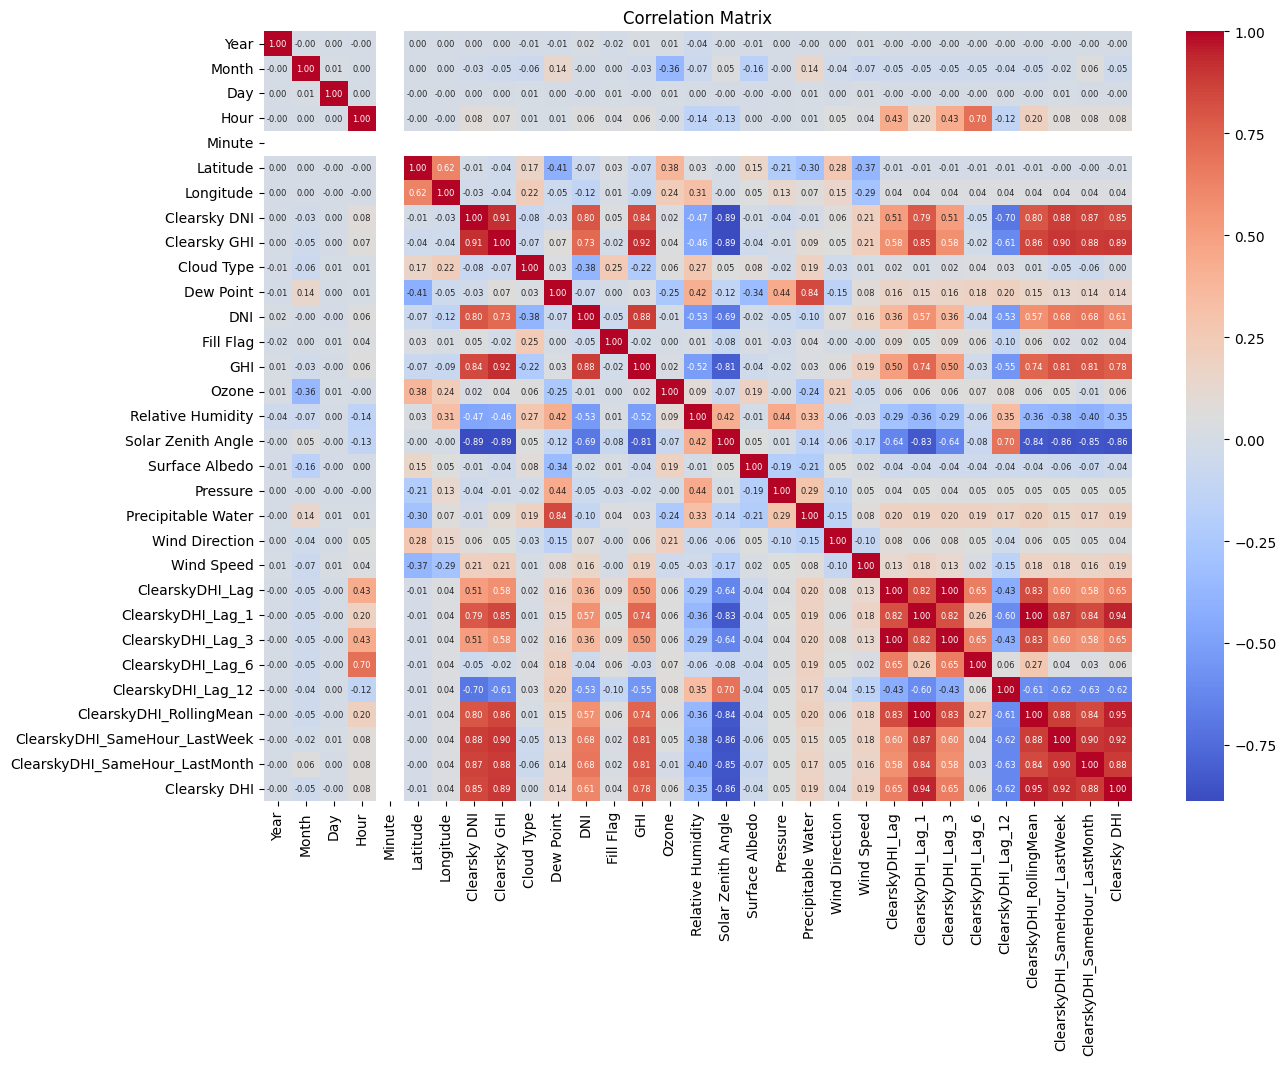

In [ ]:

# all features except the target variable
features = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'City', 'Latitude', 'Longitude',
            'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DNI', 'Fill Flag',
            'GHI', 'Ozone', 'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo',
            'Pressure', 'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Season',
            'ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag_6',
            'ClearskyDHI_Lag_12', 'ClearskyDHI_RollingMean', 'ClearskyDHI_SameHour_LastWeek',
            'ClearskyDHI_SameHour_LastMonth']

target = 'Clearsky DHI'

# correlation matrix
correlation_matrix = data[features + [target]].corr()

# Sorting features by correlation with the target variable
correlation_with_target = correlation_matrix[target].sort_values(ascending=False)

# Plot for correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 6})
plt.title('Correlation Matrix')
plt.show()



Upon finding out the important features through correlation matrix, these are the top 15 correlated features with the target variable 'Clearsky DHI':
**['ClearskyDHI_RollingMean', 'ClearskyDHI_Lag_1', 'ClearskyDHI_SameHour_LastWeek', 'Clearsky GHI', 'ClearskyDHI_SameHour_LastMonth', 'Clearsky DNI', 'GHI', 'ClearskyDHI_Lag', 'ClearskyDHI_Lag_3', 'DNI', 'Precipitable Water', 'Wind Speed', 'Dew Point', 'Hour', 'ClearskyDHI_Lag_6']**

In [ ]:
num_features_to_select = 15
# Sorting features by correlation with the target variable in ascending and descending order
correlation_with_target_positive = correlation_matrix[target].sort_values(ascending=False)
correlation_with_target_negative = correlation_matrix[target].sort_values(ascending=True)

top_features_positive = correlation_with_target_positive[1:num_features_to_select + 1].index.tolist()  # Excluding the target variable
top_features_negative = correlation_with_target_negative.head(num_features_to_select).index.tolist()

top_features_combined = top_features_positive + top_features_negative

#top 15 features based on their absolute correlation values
top_features_absolute = correlation_matrix.loc[top_features_combined, target].abs().sort_values(ascending=False).head(num_features_to_select).index.tolist()

print("Top", num_features_to_select, "features selected based on correlation with the target variable (positive and negative):")
print(top_features_absolute)


Top 15 features selected based on correlation with the target variable (positive and negative):
['ClearskyDHI_RollingMean', 'ClearskyDHI_Lag_1', 'ClearskyDHI_SameHour_LastWeek', 'Clearsky GHI', 'ClearskyDHI_SameHour_LastMonth', 'Solar Zenith Angle', 'Clearsky DNI', 'GHI', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag', 'ClearskyDHI_Lag_12', 'DNI', 'Relative Humidity', 'Precipitable Water', 'Wind Speed']


**Additionally, adding other features that are important for anomoly detection namely 'Relative Humidity', 'Cloud Type',  'Wind Direction', 'Season' and 'Surface Albedo'.**

In [ ]:
selected_features = top_features_absolute + ['Pressure', 'Cloud Type', 'Wind Direction', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter','Surface Albedo']
selected_features

['ClearskyDHI_RollingMean',
 'ClearskyDHI_Lag_1',
 'ClearskyDHI_SameHour_LastWeek',
 'Clearsky GHI',
 'ClearskyDHI_SameHour_LastMonth',
 'Solar Zenith Angle',
 'Clearsky DNI',
 'GHI',
 'ClearskyDHI_Lag_3',
 'ClearskyDHI_Lag',
 'ClearskyDHI_Lag_12',
 'DNI',
 'Relative Humidity',
 'Precipitable Water',
 'Wind Speed',
 'Pressure',
 'Cloud Type',
 'Wind Direction',
 'Season_Fall',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter',
 'Surface Albedo']

In [ ]:
#one-hot encoding for the 'Season' column
data_encoded = pd.get_dummies(data, columns=['Season'])
print(data_encoded.columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'City', 'Latitude',
       'Longitude', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI',
       'Cloud Type', 'Dew Point', 'DNI', 'Fill Flag', 'GHI', 'Ozone',
       'Relative Humidity', 'Solar Zenith Angle', 'Surface Albedo', 'Pressure',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Date',
       'ClearskyDHI_Lag', 'ClearskyDHI_Lag_1', 'ClearskyDHI_Lag_3',
       'ClearskyDHI_Lag_6', 'ClearskyDHI_Lag_12', 'ClearskyDHI_RollingMean',
       'ClearskyDHI_SameHour_LastWeek', 'ClearskyDHI_SameHour_LastMonth',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter'],
      dtype='object')


Epoch 1/100
8760/8760 [==============================] - 57s 6ms/step - loss: 0.0013 - val_loss: 1.2944e-04
Epoch 2/100
8760/8760 [==============================] - 57s 7ms/step - loss: 9.8438e-04 - val_loss: 1.3016e-04
Epoch 3/100
8760/8760 [==============================] - 57s 6ms/step - loss: 9.2701e-04 - val_loss: 1.7318e-04
Epoch 4/100
8760/8760 [==============================] - 57s 6ms/step - loss: 9.0058e-04 - val_loss: 1.4886e-04
Epoch 5/100
8760/8760 [==============================] - 57s 6ms/step - loss: 9.0086e-04 - val_loss: 1.4317e-04
Epoch 6/100
8760/8760 [==============================] - 54s 6ms/step - loss: 8.8191e-04 - val_loss: 9.1813e-05
Epoch 7/100
8760/8760 [==============================] - 54s 6ms/step - loss: 8.6706e-04 - val_loss: 9.7045e-05
Epoch 8/100
8760/8760 [==============================] - 56s 6ms/step - loss: 8.4644e-04 - val_loss: 1.3319e-04
Epoch 9/100
8760/8760 [==============================] - 55s 6ms/step - loss: 8.5368e-04 - val_loss: 1.5400e

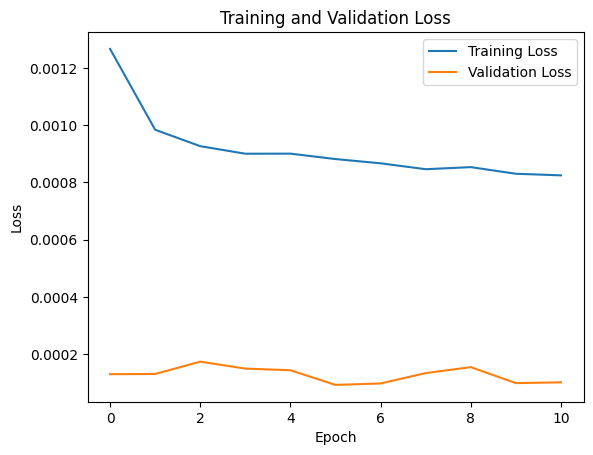

4380/4380 [==============================] - 8s 2ms/step
R-squared score on training data: 0.9892887458240613
R-squared score on test data: 0.9890610437449375


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

selected_features = [
    'ClearskyDHI_RollingMean', 'ClearskyDHI_Lag_1', 'ClearskyDHI_SameHour_LastWeek',
    'Clearsky GHI', 'ClearskyDHI_SameHour_LastMonth', 'Solar Zenith Angle', 'Clearsky DNI',
    'GHI', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag', 'ClearskyDHI_Lag_12', 'DNI',
    'Relative Humidity', 'Precipitable Water', 'Wind Speed', 'Pressure', 'Cloud Type',
    'Wind Direction', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Surface Albedo'
]

# Select data based on features
selected_data = data_encoded[selected_features + ["Clearsky DHI"]]

# Preprocessing
selected_data = selected_data.dropna()  # Drop any rows with missing values
X = selected_data.drop("Clearsky DHI", axis=1)
y = selected_data["Clearsky DHI"]

# Normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshaping input data for LSTM
n_steps = 1  # Number of previous time steps to consider
X_train = X_train.reshape((X_train.shape[0], n_steps, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], n_steps, X_test.shape[1]))

# LSTM model with dropout layers
model = Sequential([
    LSTM(units=128, activation='relu', return_sequences=True, input_shape=(n_steps, X_train.shape[2])),
    Dropout(0.5),  # Adding dropout layer to reduce overfitting
    LSTM(units=64, activation='relu', retur n_sequences=True),
    Dropout(0.5),  # Adding dropout layer to reduce overfitting
    LSTM(units=64, activation='relu'),
    Dropout(0.5),  # Adding dropout layer to reduce overfitting
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fitting the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse transforming scaled predictions
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

# R-squared scores
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("R-squared score on training data:", r2_train)
print("R-squared score on test data:", r2_test)


In [ ]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Mean Absolute Error (MAE) on training data:", mae_train)
print("Mean Absolute Error (MAE) on test data:", mae_test)


Mean Absolute Error (MAE) on training data: 3.841742776050636
Mean Absolute Error (MAE) on test data: 3.8409217749097166


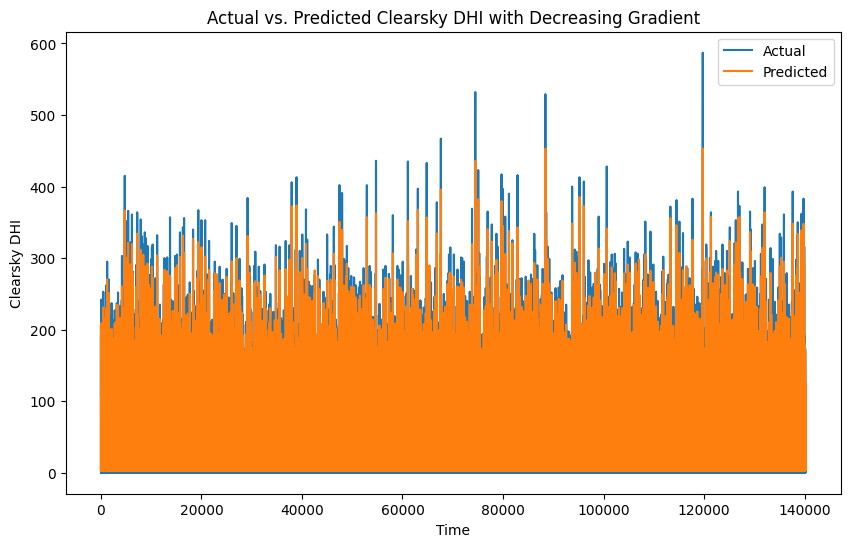

In [ ]:
# Plotting actual vs. predicted values with decreasing gradient
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test, label='Predicted')

# Adding decreasing gradient to the plot
n_points = len(y_test)
gradient = np.linspace(1, 0, n_points)
plt.fill_between(range(n_points), y_test.squeeze(), y_pred_test.squeeze(), color='skyblue', alpha=0.3, zorder=-1)

plt.xlabel('Time')
plt.ylabel('Clearsky DHI')
plt.title('Actual vs. Predicted Clearsky DHI with Decreasing Gradient')
plt.legend()
plt.show()


# **Anomaly Detection**

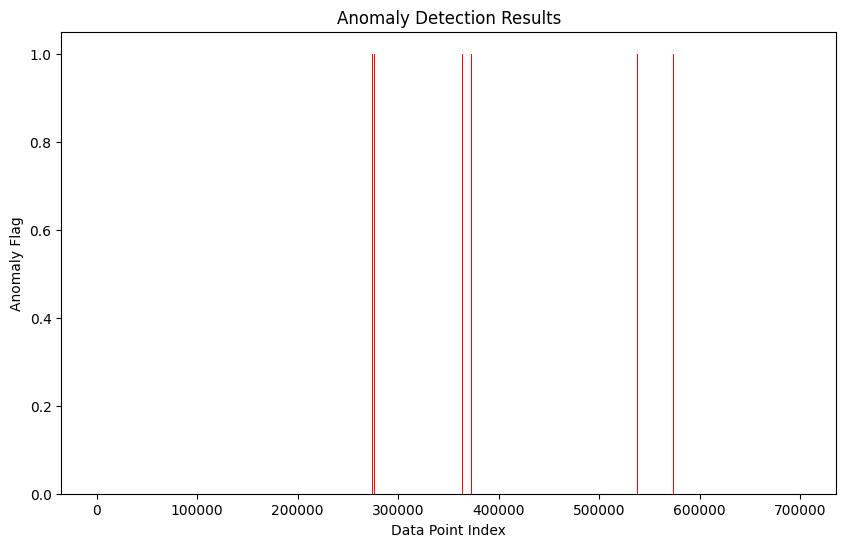

In [ ]:

selected_features = [
    'ClearskyDHI_RollingMean', 'ClearskyDHI_Lag_1', 'ClearskyDHI_SameHour_LastWeek',
    'Clearsky GHI', 'ClearskyDHI_SameHour_LastMonth', 'Solar Zenith Angle', 'Clearsky DNI',
    'GHI', 'ClearskyDHI_Lag_3', 'ClearskyDHI_Lag', 'ClearskyDHI_Lag_12', 'DNI',
    'Relative Humidity', 'Precipitable Water', 'Wind Speed', 'Pressure', 'Cloud Type',
    'Wind Direction', 'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
    'Surface Albedo', 'Clearsky DHI'
]
X = data_encoded[selected_features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training the Isolation Forest model
anomaly_detector = IsolationForest(contamination=0.01)
anomaly_detector.fit(X_scaled)

# Predict anomalies
anomaly_scores = anomaly_detector.decision_function(X_scaled)
anomalies = anomaly_scores < 0

# Visualizing anomalies
plt.figure(figsize=(10, 6))
plt.bar(range(len(anomalies)), anomalies, color='red')
plt.xlabel('Data Point Index')
plt.ylabel('Anomaly Flag')
plt.title('Anomaly Detection Results')
plt.show()



# **Conclusion and Future Scope:**

### **1. Hybrid model by combining the predictions of ARIMA and LSTM**
### **2. Anomoly Detection**
### **3. Performance Evaluation**

